# Install the Grad-CAM Package

In [ ]:
# !pip install grad-cam

# Import Library

In [3]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image

from torchvision.models import resnet50
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import numpy as np

# Load Model

In [5]:
model = resnet50(pretrained=True)
target_layers = [model.layer4[-1]]
# target_layers = [model.layer4[2].conv3]

'''
Resnet18 and 50: model.layer4[-1]
VGG and densenet161: model.features[-1]
mnasnet1_0: model.layers[-1]
ViT: model.blocks[-1].norm1
'''

/Users/rchildlin/opt/anaconda3/envs/ML/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/rchildlin/opt/anaconda3/envs/ML/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/rchildlin/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

'\nResnet18 and 50: model.layer4[-1]\nVGG and densenet161: model.features[-1]\nmnasnet1_0: model.layers[-1]\nViT: model.blocks[-1].norm1\n'

In [6]:
con2d = []
for name, layer in model.named_modules():
  if isinstance(layer, torch.nn.Conv2d):
    con2d.append(name)
print(con2d[-1])

layer4.2.conv3


# Input the Image and Transfer to Tensor

> Note: input_tensor can be a batch tensor with several images!

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

rgb_img = Image.open(r'cat.bmp').convert('RGB')
rgb_img = np.float32(rgb_img) / 255

# preprocess_image to normalize the image and transfer to tensor
input_tensor = preprocess_image(rgb_img, mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])

# CAM

## Initialize

You can also use it within a with statement, to make sure it is freed.  
In case you need to re-create it inside an outer loop:

    with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
        ...

In [9]:
use_cuda = True if torch.cuda.is_available() else False
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)


## Choose th targets

We have to specify the target we want to generate the Class Activation Maps for.  
If targets is "None", the highest scoring category will be used for every image in the batch.  
You can also use "ClassifierOutputTarget" to define your own custom targets.  

In [10]:
targets = None
# targets = [ClassifierOutputTarget(281)]

## Calculate the CAM

In [11]:
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

You can also pass `aug_smooth=True` and `eigen_smooth=True`, to apply smoothing.

`aug_smooth=True`:
* 测试时间增加：将运行时间增加x6。
* 应用水平翻转的组合，并通过[1.0，1.1，0.9]对图像进行多路复用。
* 更好的使CAM圍繞對象居中。

`eigen_smooth`:
* 去除大量noise

In [ ]:
# grayscale_cam = cam(input_tensor=input_tensor, targets=targets, aug_smooth=True, eigen_smooth=True)  

## Display the Heat Map

grayscale_cam is the result of the batch, you can display only one result to display

In [12]:
grayscale_cam = grayscale_cam[0]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

## Save

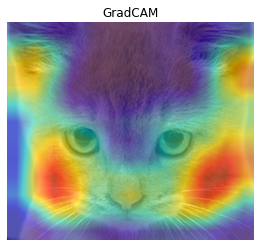

In [13]:
plt.figure("image");
plt.axis("off");plt.title("GradCAM")
plt.imshow(visualization)
plt.imsave('gradcam.png',visualization)